<a href="https://colab.research.google.com/github/Nascent-bot/ML-Projects/blob/master/CoeProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Setting Warnings
import warnings
warnings.filterwarnings('ignore')

#Read the csv file
df=pd.read_csv('tata_beverages.csv',index_col='Date',parse_dates=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ABOUT THE DATASET
We’ll be using a dataset from Quandl (you can find historical data for various stocks here) and for this particular project, 
I have used the data for  ‘Tata Global Beverages’.


**FEATURES:**

There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

1.The columns **Open** and **Close** represent the starting and final price at which the stock is traded on a particular day.

2.**High**, **Low** and **Last** represent the maximum, minimum, and last price of the share for the day.

3.**Volume** is the number of shares bought or sold in the day and **Turnover (Lacs)** is the turnover 
of the particular company on a given date.

In [2]:
#Let's Print the Head
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [4]:
df.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=2416)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2416.0,1.862711e+02,1.187402e+02,16.139999,3.434250e+01,2.130350e+02,2.664500e+02,6.736900e+02
High,2416.0,1.895782e+02,1.208923e+02,16.629999,3.489750e+01,2.167450e+02,2.709275e+02,7.861400e+02
Low,2416.0,1.829166e+02,1.168576e+02,14.980000,3.358750e+01,2.088700e+02,2.621025e+02,6.735200e+02
Close,2416.0,1.864037e+02,1.191360e+02,15.800000,3.440000e+01,2.129600e+02,2.667750e+02,7.800000e+02
Adj Close,2416.0,1.864037e+02,1.191360e+02,15.800000,3.440000e+01,2.129600e+02,2.667750e+02,7.800000e+02
Volume,2416.0,5.572722e+06,4.987809e+06,118500.000000,1.899275e+06,4.578400e+06,7.361150e+06,4.706500e+07


In [6]:
df.resample('MS')

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


# Target variable
The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

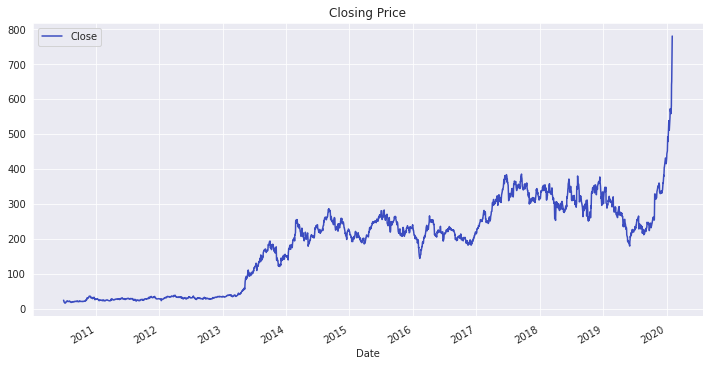

In [8]:
sns.set_style('darkgrid')
df['Close'].plot(figsize=(12,6),title='Closing Price',grid=True,colormap='coolwarm',legend=True);

It's Obvious that There is Some Sort of Exponential Trend in our Data.Later We will Verify that using Some Statistical Tests

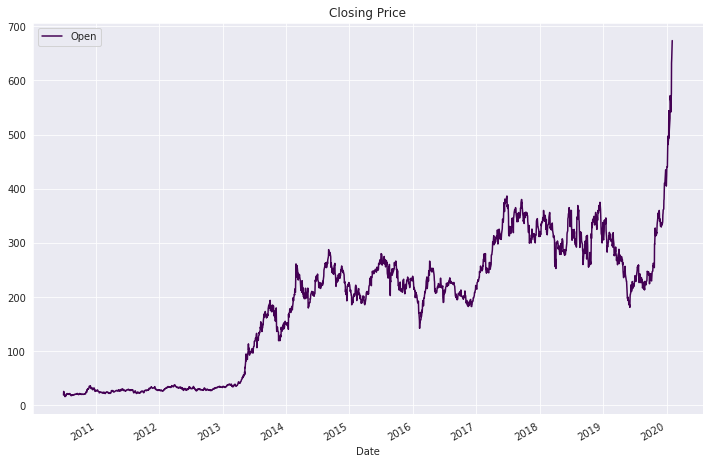

In [9]:
#Let''s Plot Out Opening Price of Our Data
sns.set_style('darkgrid')
#df['Close'].plot(figsize=(12,8),title='Closing Price',grid=True,colormap='coolwarm',legend=True);
df['Open'].plot(figsize=(12,8),title='Closing Price',grid=True,colormap='viridis',legend=True);

In [10]:
df.iloc[-1]

Open         6.736900e+02
High         7.861400e+02
Low          6.735200e+02
Close        7.800000e+02
Adj Close    7.800000e+02
Volume       4.706500e+07
Name: 2020-02-03 00:00:00, dtype: float64

It's Quite Clear that Tata Beverages Prices Started to Spike after 2014 and it had Serious High Prices in 2020 Which is Current Prices!!

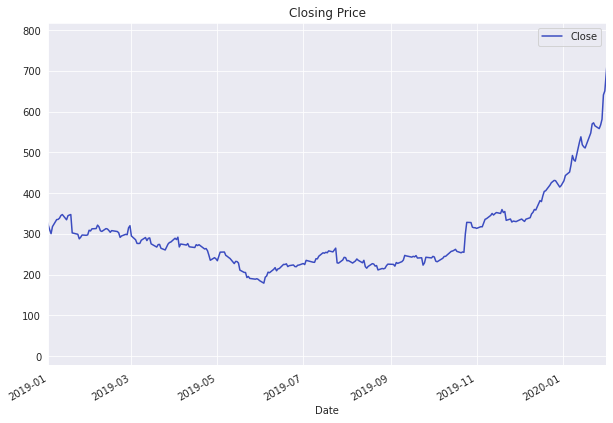

In [11]:
#let's Plot out the Closing Prices For Past One Year
sns.set_style('darkgrid')
df['Close'].plot(figsize=(10,7),title='Closing Price',grid=True,colormap='coolwarm',legend=True,
                 xlim=['2019-01-01','2020-02-01']);
#df['Open'].plot(figsize=(12,8),title='Closing Price',grid=True,colormap='coolwarm',legend=True,xlim=['2019-01-01','2019-12-31'])
                                                                                                      

There Was a Quite Small Down Trend During June Month of 2019 Later The Price Started Increasing Higher after Dec 2019

In [12]:
#Let's Plot out the Volume Per Year
yearly_vol=df.resample('Y').mean()
yearly_vol

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,23.408000,24.077231,22.646077,23.341846,23.341846,1.579762e+06
2011-12-31,26.821984,27.380238,26.194167,26.804762,26.804762,1.290615e+06
2012-12-31,31.203120,31.809160,30.545880,31.168600,31.168600,1.229796e+06
2013-12-31,104.416428,106.853016,101.779881,104.401230,104.401230,8.407722e+06
2014-12-31,223.415397,227.449881,219.206111,223.329088,223.329088,6.913973e+06
2015-12-31,229.831944,233.381666,226.270635,230.042898,230.042898,4.318325e+06
2016-12-31,210.058452,213.433492,206.286151,209.767262,209.767262,4.612546e+06
2017-12-31,314.296215,318.450598,309.686972,314.316295,314.316295,6.334786e+06
2018-12-31,317.183466,323.693626,310.552311,317.309921,317.309921,8.612107e+06


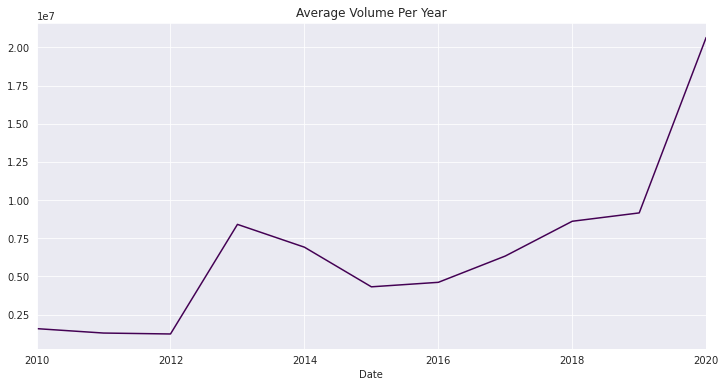

In [13]:
yearly_vol['Volume'].plot(title='Average Volume Per Year',grid=True,colormap='viridis',figsize=(12,6))

Hmm It's Quiet Clear that people Started Buying More Stocks Later 2019 Might be Because of many reasons!!

In [0]:
#Let's Check out Closing Prices in Quarters
from statsmodels.graphics.tsaplots import month_plot
moth=df.resample('M').mean()

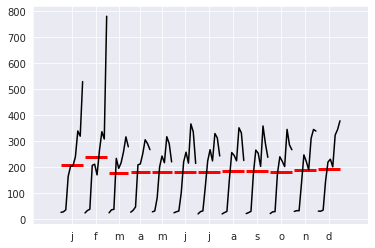

In [15]:
month_plot(moth['Close']);

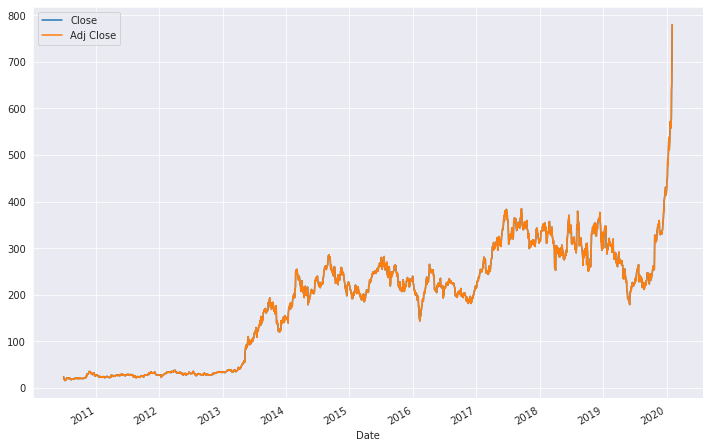

In [16]:
df[['Close','Adj Close']].plot(figsize=(12,8))

In [17]:
df[df['Close']==df['Adj Close']].shape

(2416, 6)

# Adjusted closing price factors in corporate actions such as stock splits, dividends / distributions and rights offerings.

But in our Data Set Close Price and Adj Close Price where just same so let's Drop this out!!

In [0]:
df=df.drop('Adj Close',axis=1)

In [19]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [0]:
yearly_mean=df.resample('Y').mean()

In [21]:
yearly_mean['Close']

Date
2010-12-31     23.341846
2011-12-31     26.804762
2012-12-31     31.168600
2013-12-31    104.401230
2014-12-31    223.329088
2015-12-31    230.042898
2016-12-31    209.767262
2017-12-31    314.316295
2018-12-31    317.309921
2019-12-31    273.530198
2020-12-31    540.083639
Freq: A-DEC, Name: Close, dtype: float64

In [22]:
#Closing Value Percent Increase from 2010 to 2020
((yearly_mean['Close'][-1]-yearly_mean['Close'][0])/yearly_mean['Close'][0])*100

2213.8000115342534

Bam there was a increase of 2.2k % from the average of Closing Price in 2010

In [0]:
#Now Let's Calculate Which Year had Highest Percentage Change than Previous Year
yearly_mean1=yearly_mean.shift(1)

In [24]:
abs(((yearly_mean['Close']-yearly_mean1['Close'])/yearly_mean['Close'])*100)

Date
2010-12-31          NaN
2011-12-31    12.919032
2012-12-31    14.000751
2013-12-31    70.145371
2014-12-31    53.252292
2015-12-31     2.918504
2016-12-31     9.665777
2017-12-31    33.262365
2018-12-31     0.943439
2019-12-31    16.005444
2020-12-31    49.354104
Freq: A-DEC, Name: Close, dtype: float64

There Was Highest Percentage Increase in Avg Closing Price in the Year 2014,Later 2020 is Having Highest percentage Change!!

# Train_Test Split

Unlike Regular Machine Learning Model We dont Perform Train_test_split here.

Because Our Data Completely Deals With Price over a Date so We will Do the Followinf Steps.

1.We Split Our Data into Train  and Test Data using index.

2.Say 7 years is taken as Training Data and Last 3 Years as testing

3.We Fit Our Model using Training Data 

4.We Compare Our Predictions With our Test Data and We Wil Check How Well our Model Forecasts Actually Known Data

5.Once Our Model Performs Well We Forecast the Future Predictions

6.Evaluation is Done Using RMSE,MSE,MAE

In [25]:
df.loc[:'2017-12-31'].shape

(1891, 5)

We Took **2010-2017** As Our Training Data 
and **2018-2020** As Our Testing Data


In [0]:
train=df['Close'][:1891]
test=df['Close'][1891:]

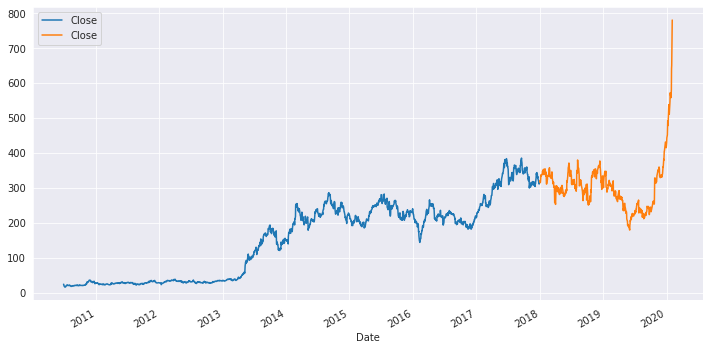

In [27]:
#Our Actual Data
train.plot(figsize=(12,6),legend=True)
test.plot(figsize=(12,6),legend=True)

In [0]:
def ad_test(series):
    #Reading Series Data adn Performing Augumented Dicky Fuller Test
    res=adfuller(series)
    
    #Converting the Test Result to DataFrame
    test_Series=pd.Series(res[:4],index=['Statistic_test','P-Value','No_of_lags','#of_observation'])
    
    print(test_Series)
    
    
    #Checking p value and if p is <0.05 we reject our Null Hypothesis and if p >0.05 we Fail to Reject Hypothesis
    if(test_Series[1]<0.05):
        print("Given Data is Satationary")
        print("We Strongly Reject the Null Hypothesis")
    
    else:
        print("Given Data is Non-Satationary")
        print("We Fail to Reject the Null Hypothesis")
    

In [29]:
from statsmodels.tsa.stattools import adfuller
ad_test(df['Close'])

Statistic_test        1.400069
P-Value               0.997114
No_of_lags           18.000000
#of_observation    2397.000000
dtype: float64
Given Data is Non-Satationary
We Fail to Reject the Null Hypothesis


# Auto ARIMA Model

ARIMA is a very popular statistical method for time series forecasting. 

ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

p (past values used for forecasting the next value)

q (past forecast errors used to predict the future values)

d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

In [30]:
!pip install pyramid.arima




  Using cached https://files.pythonhosted.org/packages/5c/84/57422f2a6ade3161c586545e38b518ba1b7ab30ee4a4acc29110c0aba2bc/pyramid_arima-0.9.0-cp36-cp36m-manylinux1_x86_64.whl


In [0]:
from pyramid.arima import auto_arima

In [73]:
model=auto_arima(train,trace=True,error_action='ignore',suppress_warnings=True).fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=11299.996, BIC=11333.262, Fit time=4.443 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=11305.395, BIC=11316.484, Fit time=0.159 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=11304.683, BIC=11321.316, Fit time=0.115 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=11304.743, BIC=11321.376, Fit time=0.291 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=11306.796, BIC=11334.517, Fit time=1.457 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=11309.240, BIC=11348.050, Fit time=1.515 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=11306.817, BIC=11334.539, Fit time=1.693 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=11309.215, BIC=11348.025, Fit time=2.722 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=11306.631, BIC=11328.808, Fit time=0.545 seconds
Fit ARIMA: order=(3

In [0]:
forecast = model.predict(n_periods=525)
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

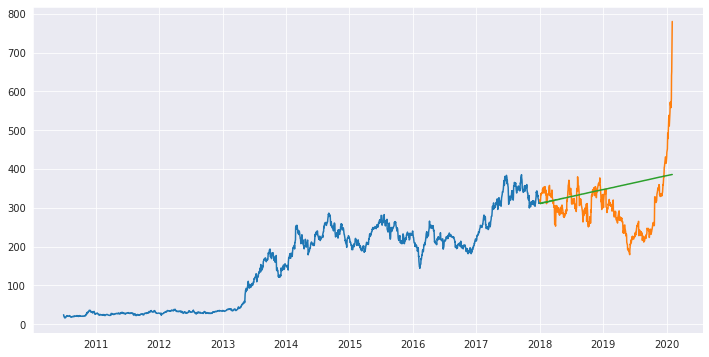

In [83]:
plt.figure(figsize=(12,6))
plt.plot(train)
plt.plot(test)
plt.plot(forecast['Prediction'])

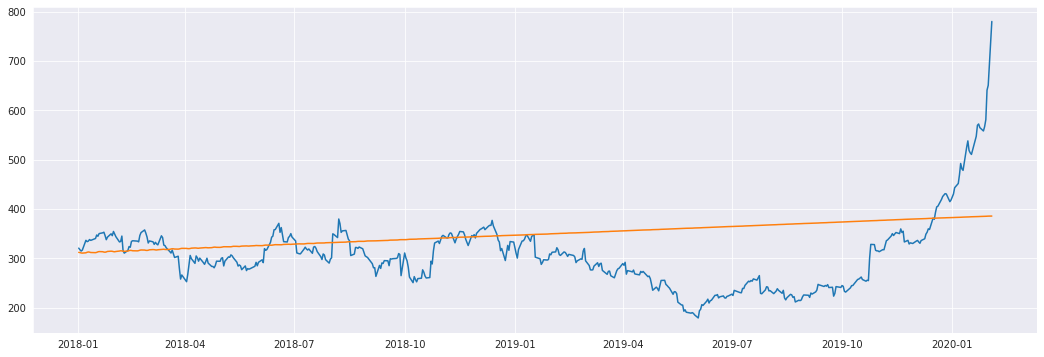

In [86]:
plt.figure(figsize=(18,6))
plt.plot(test)
plt.plot(forecast['Prediction'])


In [0]:
from sklearn.metrics import mean_squared_error

In [88]:
np.sqrt(mean_squared_error(test,predictions))

85.96806657451657

In [114]:
model=auto_arima(df['Close'],trace=True,error_action='ignore',suppress_warnings=True).fit(df['Close'])

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=16279.036, BIC=16313.773, Fit time=3.967 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=16299.661, BIC=16311.240, Fit time=0.087 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=16298.813, BIC=16316.181, Fit time=0.153 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=16299.182, BIC=16316.550, Fit time=0.449 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=16291.515, BIC=16320.462, Fit time=0.842 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=16280.851, BIC=16321.377, Fit time=4.922 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=16291.416, BIC=16320.363, Fit time=0.870 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=16280.622, BIC=16321.148, Fit time=5.476 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=16275.419, BIC=16298.577, Fit time=2.333 seconds
Total fit time: 19.

In [0]:
index=pd.date_range('2020-02-01',periods=525,freq='D')


In [0]:
forecast_df = model.predict(n_periods=525)
forecast_df = pd.DataFrame(forecast_df,index=index,columns=['Prediction'])

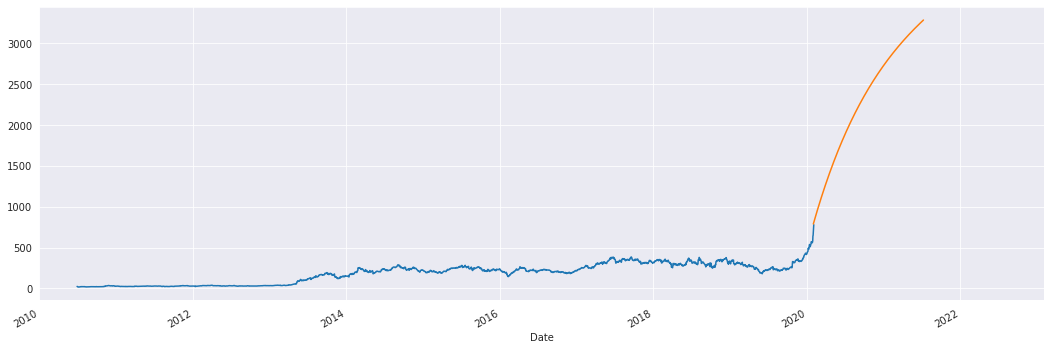

In [132]:
df['Close'].plot(xlim=['2010-01-01','2023-02-02'],figsize=(18,6))
forecast_df['Prediction'].plot(figsize=(18,6))